# 1. Using the Negative Selection Algorithm

## 1.1

Run the commands below to get the anomaly score for each test set and store them in output files

```
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < tagalog.test > out_tag_2.txt
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < english.test > out_eng_2.txt
```





In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [0]:
def get_tuples(eng_filename,other_filename,str_other):
  eng = open(eng_filename).readlines()
  other = open(other_filename).readlines()
  num_eng = [float(x) for x in eng]
  num_other = [float(x) for x in other]
  print(sum(num_eng)/len(num_eng))
  print(sum(num_other)/len(num_other))
  tuples = [('eng', x) for x in num_eng]
  for x in num_other:
    tuples.append((str_other, x))
  tuples.sort(key=lambda tup: tup[1])
  return num_eng, num_other, tuples

In [0]:
def sens_spec(num_eng,num_other,tuples,str_other):
  sens, spec = [], []
  norm_eng = len(num_eng)
  norm_tag = len(num_other)
  for (label, val) in tuples:
    anom_count, norm_count = 0, 0
    for (label2, val2) in tuples:
        if label2 == str_other and val < val2:
            anom_count += 1
        if label2 == 'eng' and val > val2:
            norm_count += 1
    sens.append((100/norm_tag)*anom_count)
    spec.append((100/norm_eng)*norm_count)
  return sens,spec

In [0]:
def plot_auc(sens,spec):
  print("AUC: ",auc([1-x/100 for x in spec],[x/100 for x in sens]))
  plt.plot([1-x/100 for x in spec],[x/100 for x in sens])
  plt.plot([x/10 for x in range(0,11,1)], [x/10 for x in range(0,11,1)],'--', color='orange')
  plt.ylabel('sensitivity')
  plt.xlabel('1-specificity')
  plt.show()

30.620943399026366
31.238324663081123
AUC:  0.7911483962092217


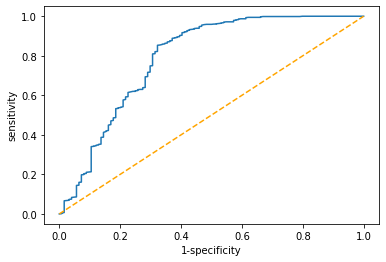

In [24]:
num_eng, num_tag,tuples = get_tuples("eng_4.txt","tag_4.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

## 1.2

We again store the results in output files.


```
for i in range(1,10):
  java -jar negsel2.jar -self english.train -n 10 -r i -c -l < english.test > eng_i.txt
  java -jar negsel2.jar -self english.train -n 10 -r i -c -l < tagalog.test > tag_i.txt
```

The plots below show AUC score for r in [1,9].




0.3159038857512391
1.4227617597206217
AUC:  0.0774444140696191


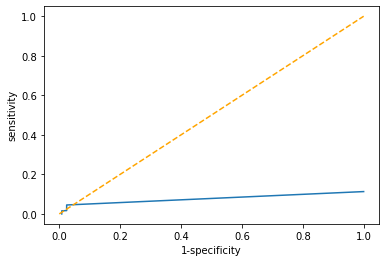

In [20]:
num_eng, num_tag,tuples = get_tuples("eng_1.txt","tag_1.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

28.04872664578754
35.6495703108324
AUC:  0.7352321396026973


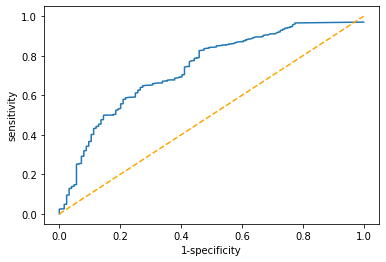

In [21]:
num_eng, num_tag,tuples = get_tuples("eng_2.txt","tag_2.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

34.70181600338574
35.72284312217208
AUC:  0.8307419810461089


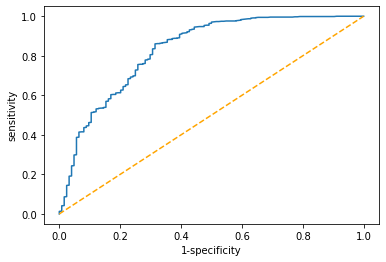

In [22]:
num_eng, num_tag,tuples = get_tuples("eng_3.txt","tag_3.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

30.620943399026366
31.238324663081123
AUC:  0.7911483962092217


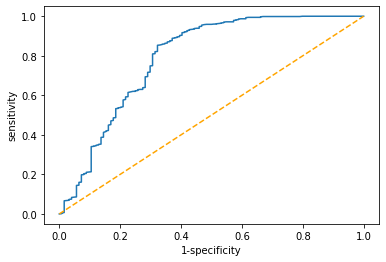

In [25]:
num_eng, num_tag,tuples = get_tuples("eng_4.txt","tag_4.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

26.103272123958945
26.309285953195445
AUC:  0.7275264260980498


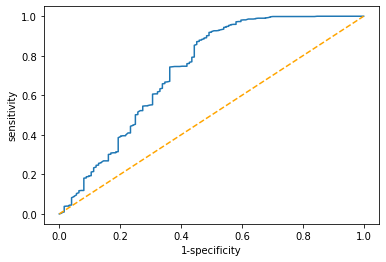

In [27]:
num_eng, num_tag,tuples = get_tuples("eng_5.txt","tag_5.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

21.201345330485967
21.2978628707426
AUC:  0.6016322671769637


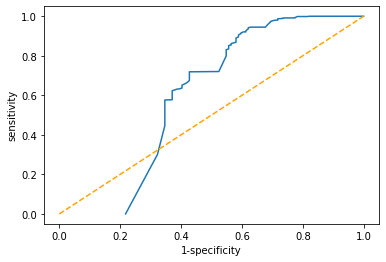

In [28]:
num_eng, num_tag,tuples = get_tuples("eng_6.txt","tag_6.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

16.182486434633702
16.224036067559975
AUC:  0.17702068525605974


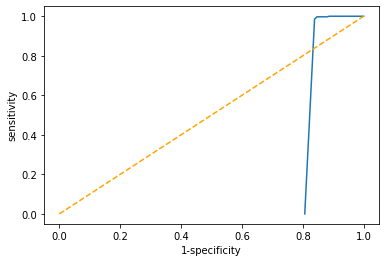

In [29]:
num_eng, num_tag,tuples = get_tuples("eng_7.txt","tag_7.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

11.0366670160102
11.059344460824597
AUC:  0.03629032258064513


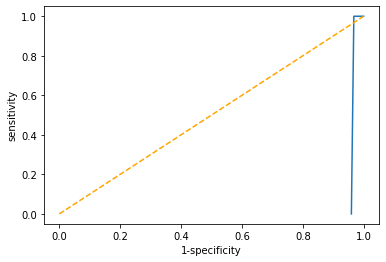

In [30]:
num_eng, num_tag,tuples = get_tuples("eng_8.txt","tag_8.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

5.745488477192401
5.754887502163457
AUC:  0.020161290322580627


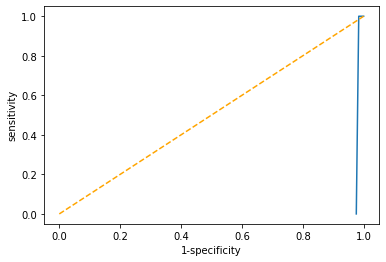

In [31]:
num_eng, num_tag,tuples = get_tuples("eng_9.txt","tag_9.txt","tag")
sens, spec = sens_spec(num_eng,num_tag,tuples,"tag")
plot_auc(sens,spec)

## 1.3

We run:

```
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < english.test > eng_13.txt
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < hiligaynon.txt > hil_13.txt
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < middle-english.txt > mid_13.txt
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < plautdietsch.txt > pla_13.txt
java -jar negsel2.jar -self english.train -n 10 -r 4 -c -l < xhosa.txt > xho_13.txt
```

In [0]:
eng = open("eng_13.txt").readlines()
hil = open("hil_13.txt").readlines()
mid = open("mid_13.txt").readlines()
pla = open("pla_13.txt").readlines()
xho = open("xho_13.txt").readlines()

num_eng = [float(x) for x in eng]
num_hil = [float(x) for x in hil]
num_mid = [float(x) for x in mid]
num_pla = [float(x) for x in pla]
num_xho = [float(x) for x in xho]

print(sum(num_eng)/len(num_eng))
print(sum(num_hil)/len(num_hil))
print(sum(num_mid)/len(num_mid))
print(sum(num_pla)/len(num_pla))
print(sum(num_xho)/len(num_xho))


30.620943399026366
31.24260586011447
30.901190560169297
31.214861595951028
31.251375832049963
